# Try out clustering for Footprints

In [45]:
using DataFrames, CSV, wgregseq, CairoMakie, Clustering, Distances, LinearAlgebra, MultivariateStats, Statistics
set_theme!()
wgregseq.viz.default_makie!()

In [24]:
df_exshift = CSV.read("../../figures/interactive_footprints/20231207_exshifts.csv", DataFrame)
df_exshift = df_exshift[df_exshift.promoter .== "araBp", :]

gdf = groupby(df_exshift, [:growth_condition, :replicate])
p_ex = [df.expression_shift for df in gdf];

df_footprints = CSV.read("../../figures/interactive_footprints/20231207_footprints.csv", DataFrame)
df_footprints = df_footprints[(df_footprints.promoter .== "araBp") .& (df_footprints.d .== 0), :]

gdf = groupby(df_footprints, [:growth_condition, :replicate, :d])
p_mi = [df.mut_info for df in gdf];

gc = [(df.growth_condition[1], df.replicate[1]) for df in gdf]
for (i, j) in enumerate(gc)
    println(i, ", ", j)
end

1, ("Glucose", 1)
2, ("Glucose", 2)
3, ("Ampicillin", 1)
4, ("H2O2 (0.1mM, 30min)", 1)
5, ("LB", 1)
6, ("LB", 2)
7, ("Xylose", 1)
8, ("Xylose", 2)
9, ("Arabinose", 1)
10, ("Arabinose", 2)
11, ("Sodium Salicytate", 1)
12, ("Ethanol", 1)
13, ("Stationary Phase (1d)", 1)
14, ("Nirtogen starvation", 1)
15, ("Magnesium starvation", 1)
16, ("Sulphur starvation", 1)
17, ("Sodium Salicytate (induction)", 1)
18, ("Ampicillin (induction)", 1)
19, ("Ethanol (induction)", 1)
20, ("Ethanol (induction)", 2)
21, ("Glutamic acid (pH 2.5)", 1)
22, ("2pH (HCl)", 1)
23, ("Medium Cold shock 19C ", 1)
24, ("2,2-Dipyridyl ", 1)
25, ("Phenazine Methosulfate ", 1)
26, ("Pyruvate", 1)
27, ("H2O2 (2.5mM, 10min)", 1)
28, ("Gentamycin", 1)
29, ("Copper Sulfate", 1)
30, ("Spermidine", 1)
31, ("Serine Hydroxamate", 1)
32, ("Low Osmolarity", 1)
33, ("LB + higher salt concentration - high osmolarity", 1)
34, ("Low Phosphate", 1)
35, ("Galactose", 1)
36, ("Cold Shock (1h at 10C)", 1)


## Dimensionality Reductions

### PCA

In [34]:
# normalize each growth condition
X_ex = hcat(p_ex...)
X_ex_std = (X_ex .- mean(X_ex, dims=1)) ./ std(X_ex, dims=1)

X_mi = hcat(p_mi...)
X_mi_std = (X_mi .- mean(X_mi, dims=1)) ./ std(X_mi, dims=1)

# perform PCA
pca_ex = fit(PCA, X_ex_std; maxoutdim=2)
pca_mi = fit(PCA, X_mi_std; maxoutdim=2)


PCA(indim = 160, outdim = 2, principalratio = 0.32147543425725017)

Pattern matrix (unstandardized loadings):
─────────────────────────────
             PC1          PC2
─────────────────────────────
1     0.00315528  -0.252022
2    -0.138184    -0.139485
3     0.153705    -0.252246
4     0.315704     0.270828
5     0.0861438   -0.119587
6    -0.198418     0.0168951
7     0.237764    -0.278784
8     0.0634038   -0.45902
9    -0.114497     0.00246337
10   -0.107567    -0.0951373
11   -0.0654333   -0.189446
12   -0.11713     -0.025597
13    0.0349466    0.105004
14    0.154514    -0.195042
15   -0.064065     0.0910279
16    0.0139959   -0.203943
17   -0.110548    -0.433348
18    0.0607438   -0.247482
19   -0.0767486   -0.0894526
20   -0.0435598   -0.0322592
21    0.117189    -0.119029
22   -0.014871    -0.212104
23   -0.154868    -0.0374043
24    0.220372    -0.146753
25   -0.0174385    0.0213992
26    0.247153     0.182594
27    0.12083      0.0150077
28   -0.0430617   -0.152535
29   -0

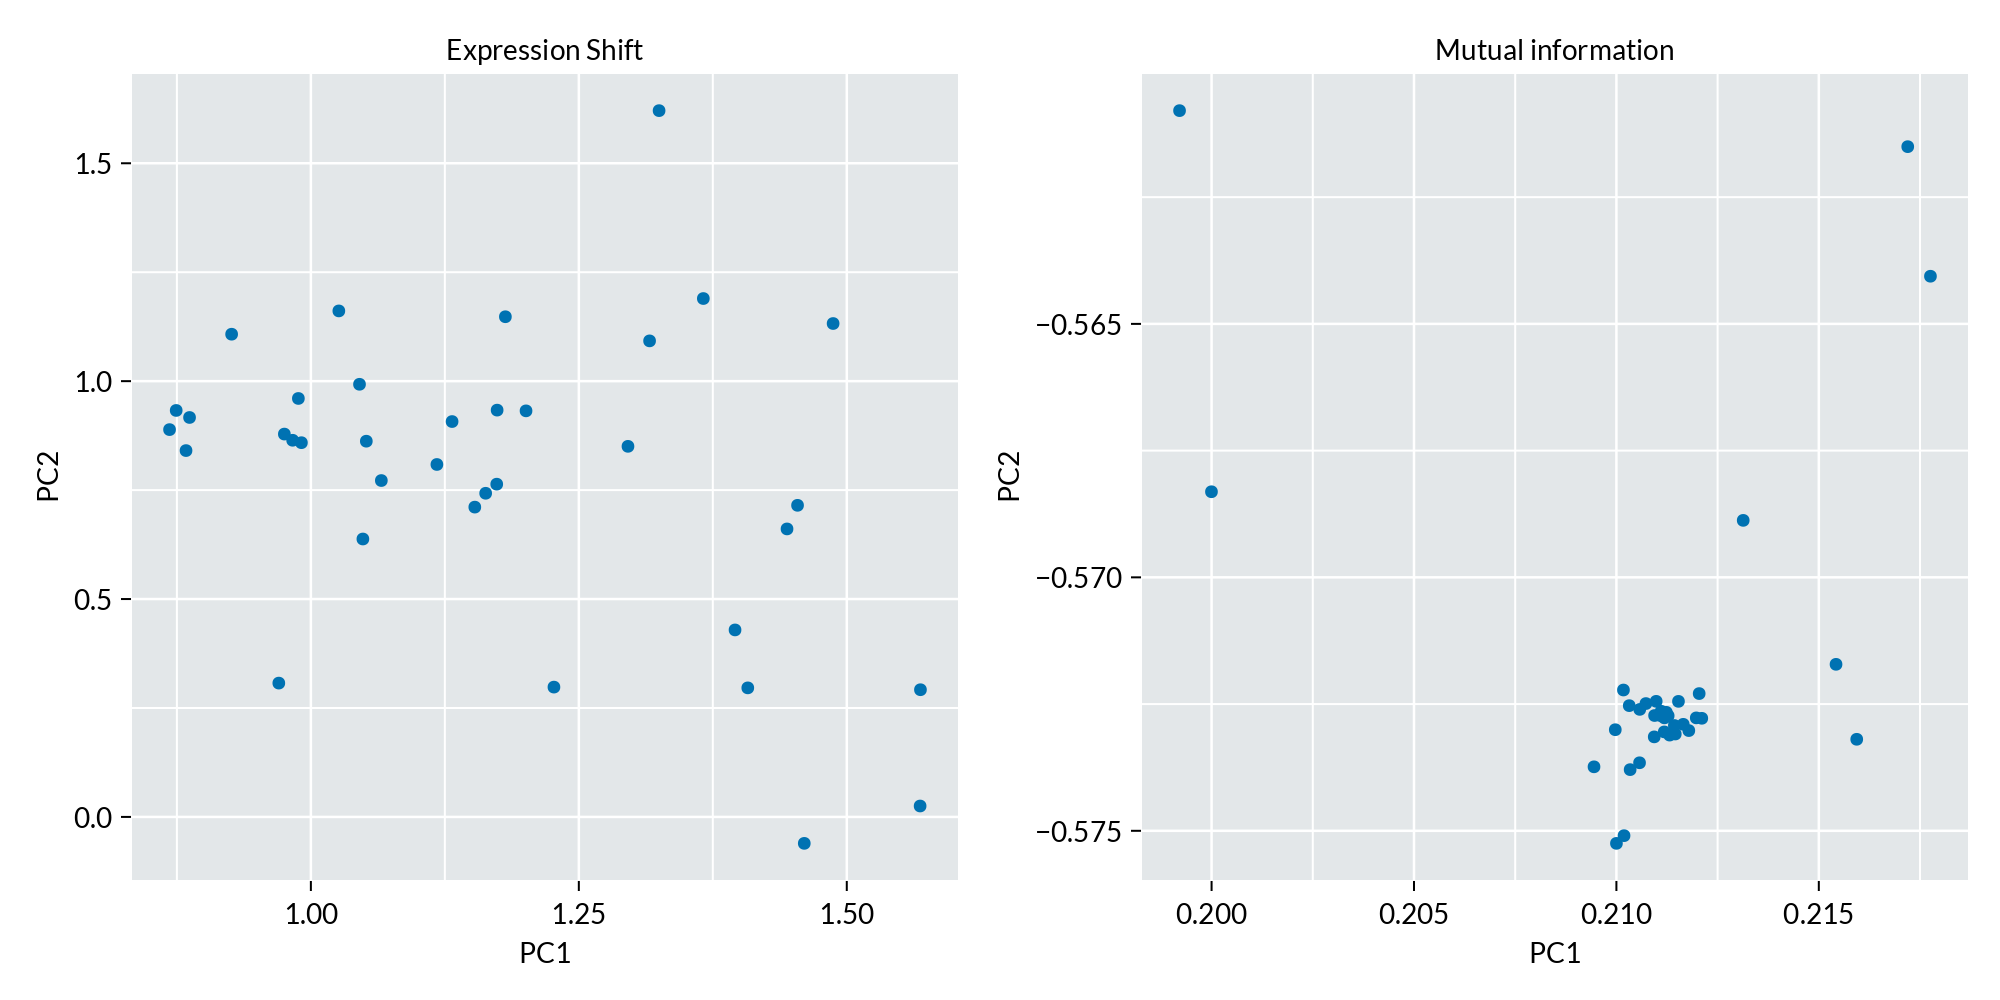

In [57]:
fig = Figure(size=(1000, 500))

ax = Axis(fig[1, 1], xlabel="PC1", ylabel="PC2", title="Expression Shift")
Yte_ex = predict(pca_ex, X_ex)
scatter!(ax, Yte_ex)

ax2 = Axis(fig[1, 2], xlabel="PC1", ylabel="PC2", title="Mutual information")
Yte_mi = predict(pca_mi, X_mi)
scatter!(ax2, Yte_mi)

fig

In [53]:
println("Arabinose")
Yte_ex[:, 9:10] |> println
Yte_mi[:, 9:10] |> println

println("Xylose")
Yte_ex[:, 7:8] |> println
Yte_mi[:, 7:8] |> println

println("Low phosphate")
Yte_ex[:, 36] |> println
Yte_mi[:, 36] |> println


println("Galactose")
Yte_ex[:, 35] |> println
Yte_mi[:, 35] |> println

Arabinose
[-10.71497074937561 -10.314625974820972; -0.0680993508047337 0.2504951035621391]
[-5.790695741044598 -5.7917920711359585; 1.4651578229459452 1.4624036918598413]
Xylose
[-7.611345944708883 -7.459787898007057; 3.17908874000895 3.146330882688934]
[-5.765562703067016 -5.77056056077673; 1.4945306264983442 1.4958176968033106]
Low phosphate
[-7.7501577507381345, 3.2350734099525256]
[-5.763417800269564, 1.4946442070271053]
Galactose
[-8.958699289302624, 5.0843982593879815]
[-5.781222031138848, 1.4948248732501934]


Let's try to use only the -10 region to run PCA on.

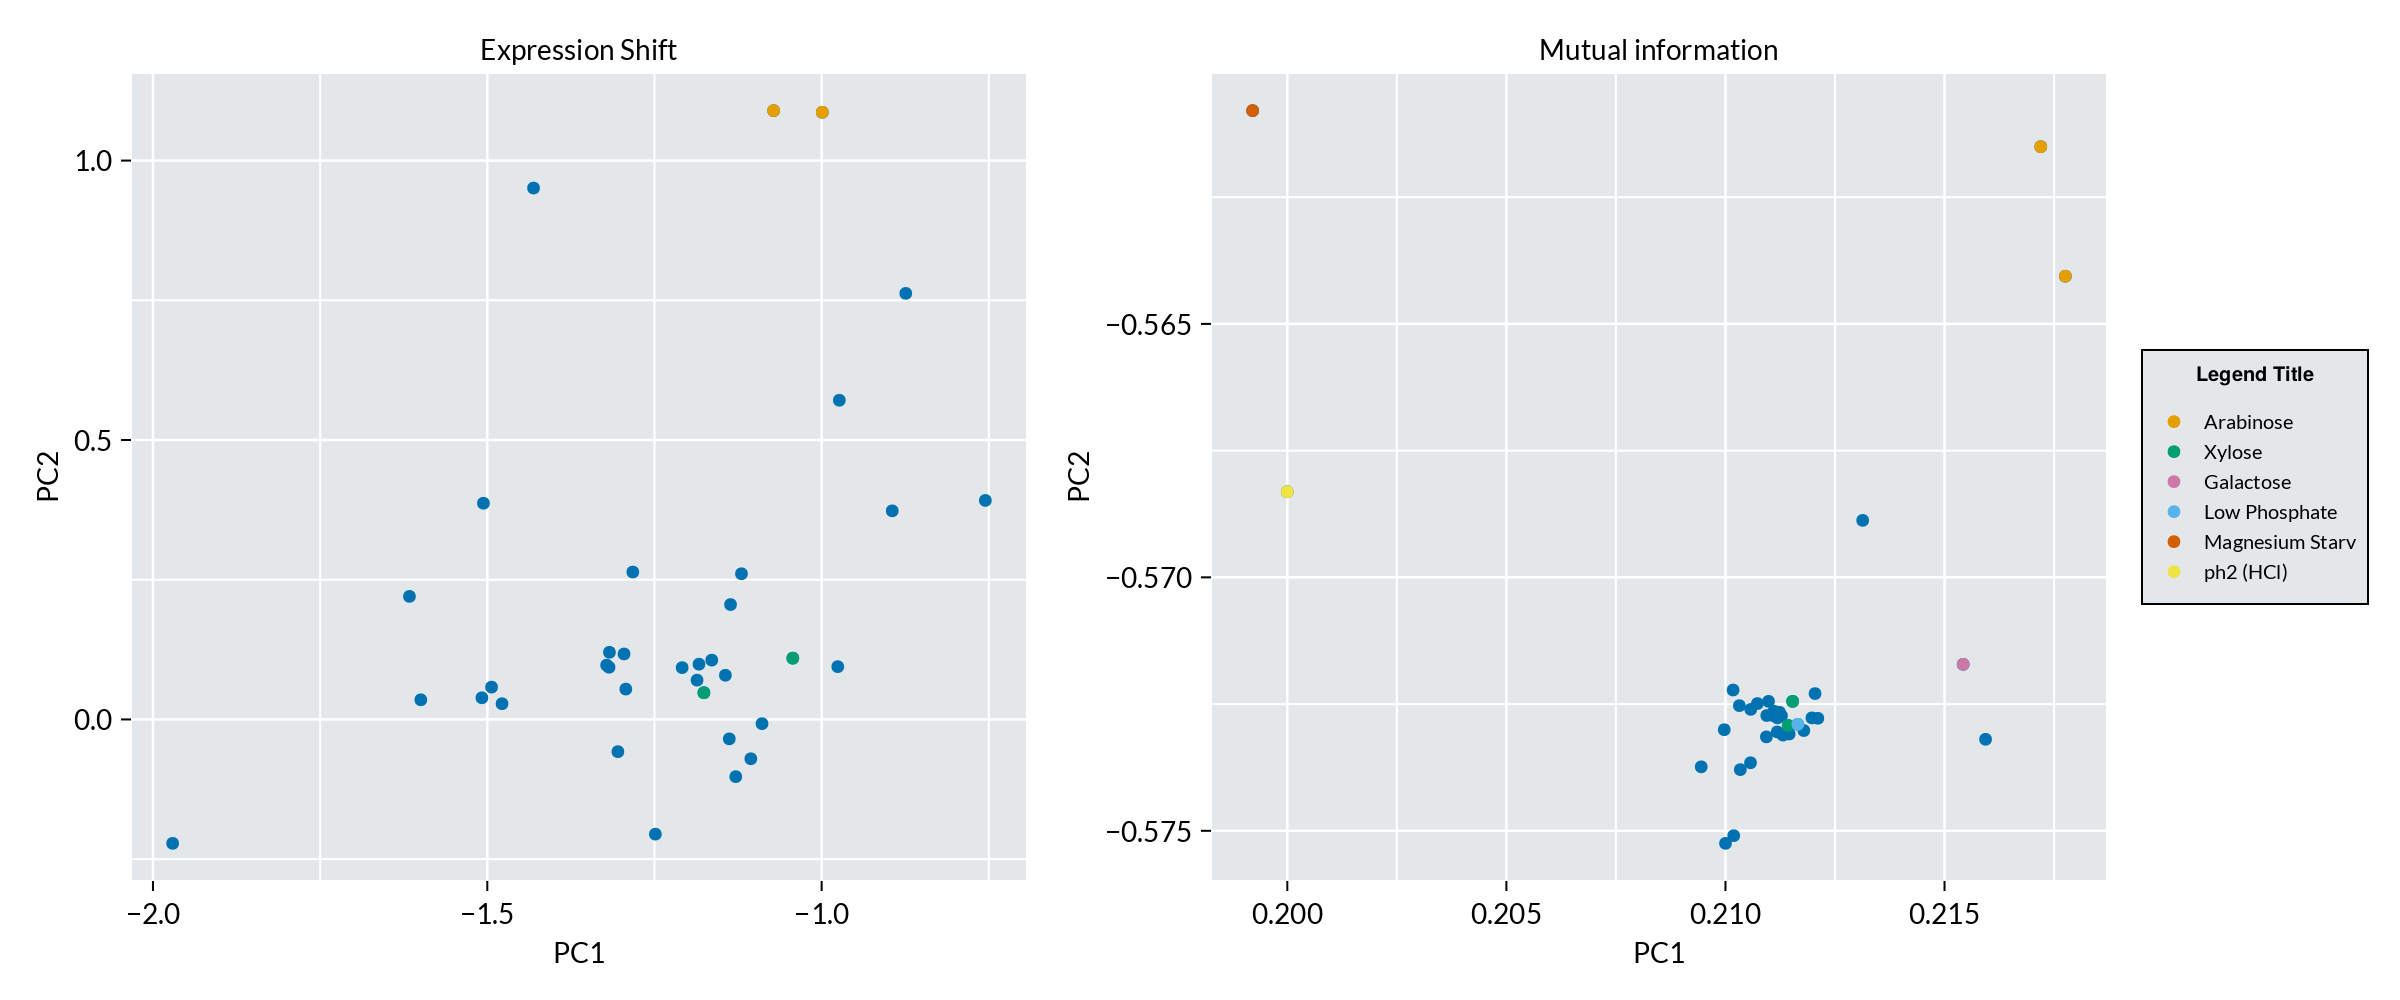

In [98]:
# normalize each growth condition
X_ex = hcat([p[97*4+1:106*4] for p in p_ex]...)
X_ex_std = (X_ex .- mean(X_ex, dims=1)) ./ std(X_ex, dims=1)

X_mi = hcat([p[95:105] for p in p_mi]...)
X_mi_std = (X_mi .- mean(X_mi, dims=1)) ./ std(X_mi, dims=1)

# perform PCA
pca_ex = fit(PCA, X_ex_std; maxoutdim=2)
pca_mi = fit(PCA, X_mi_std; maxoutdim=2)

fig = Figure(size=(1200, 500))

ax = Axis(fig[1, 1], xlabel="PC1", ylabel="PC2", title="Expression Shift")
Yte_ex = predict(pca_ex, X_ex)
scatter!(ax, Yte_ex)
scatter!(ax, Yte_ex[:, 9:10])
scatter!(ax, Yte_ex[:, 7:8])

ax2 = Axis(fig[1, 2], xlabel="PC1", ylabel="PC2", title="Mutual information")
Yte_mi = predict(pca_mi, X_mi)
scatter!(ax2, Yte_mi)
scatter!(ax2, Yte_mi[:, 9:10], label="Arabinose")
scatter!(ax2, Yte_mi[:, 7:8], label="Xylose")
scatter!(ax2, Yte_mi[:, 35]..., label="Galactose")
scatter!(ax2, Yte_mi[:, 36]..., label="Low Phosphate")
scatter!(ax2, Yte_mi[:, 15]..., label="Magnesium Starv")
scatter!(ax2, Yte_mi[:, 22]..., label="ph2 (HCl)")

leg = Legend(fig, ax2, "Legend Title", orientation=:vertical)
fig[1, 3] = leg

#Legend(fig[1, 3])
fig

In [77]:
println("Arabinose")
println("ES: ", Yte_ex[:, 9:10])
println("MI: ", Yte_mi[:, 9:10])

println("Xylose")
println("ES: ", Yte_ex[:, 7:8])
println("MI: ", Yte_mi[:, 7:8])

println("Low phosphate")
println("ES: ", Yte_ex[:, 36])
println("MI: ", Yte_mi[:, 36])


println("Galactose")
println("ES: ", Yte_ex[:, 35])
println("MI: ", Yte_mi[:, 35])

Arabinose
ES: [-0.9990641729559018 -1.0717711612043967; 1.0864309359001794 1.0893842516668928]
MI: [0.2177578817305759 0.21719681089563111

; -0.564059988764262 -0.5615040905445686]
Xylose
ES: [-1.1761122828210386 -1.0431104510701494; 0.0478269246741813 0.10962532645594691]
MI: [0.21143144056306148 0.21153302683692887; -0.5729225553159966 -0.5724465573526831]
Low phosphate
ES: [-1.13623183064611, 0.20556630049119695]
MI: [0.21165127988422877, -0.5728993053922646]
Galactose
ES: [-1.4308400235825864, 0.9508824608674491]
MI: [0.21542539497285926, -0.5717158135919836]


In [92]:
(Yte_mi[1, :] .< 0.205) |> println

Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
reshape(X_ex[:, 9], 4, 9) |> display

4×9 Matrix{Float64}:
 -0.154469   -0.239564  1.0        …   0.208533    0.943083  -0.270828
  0.0        -0.112595  0.0           -0.0798514   0.240671  -0.330679
  0.0443476   0.267748  0.0953338     -0.341048    0.0       -0.299194
 -0.175972    0.0       0.0307941      0.0        -0.221199   0.0

## K-means clustering

Let's try to simply cluster the expression shift matrices using the k-means method. In this method, a fixed number of clusters is initially set randomly. Then, the cluster centers are moved while minimizing the distance to points in the vicinity,
$$
\mathrm{minimize} \sum_{i=1}^n \left|\left|\mathbf{x}_i - \mathbf{\mu}_{z_i}\right|\right|^2\ \mathrm{w.r.t. }\ (\mathbf{\mu}, z)
$$
Here, $\mathbf{μ}_k$​ is the center of the $k$-th cluster, and $z_i$​ is an index of the cluster for $i$-th point $\mathbf{x}_i$​.

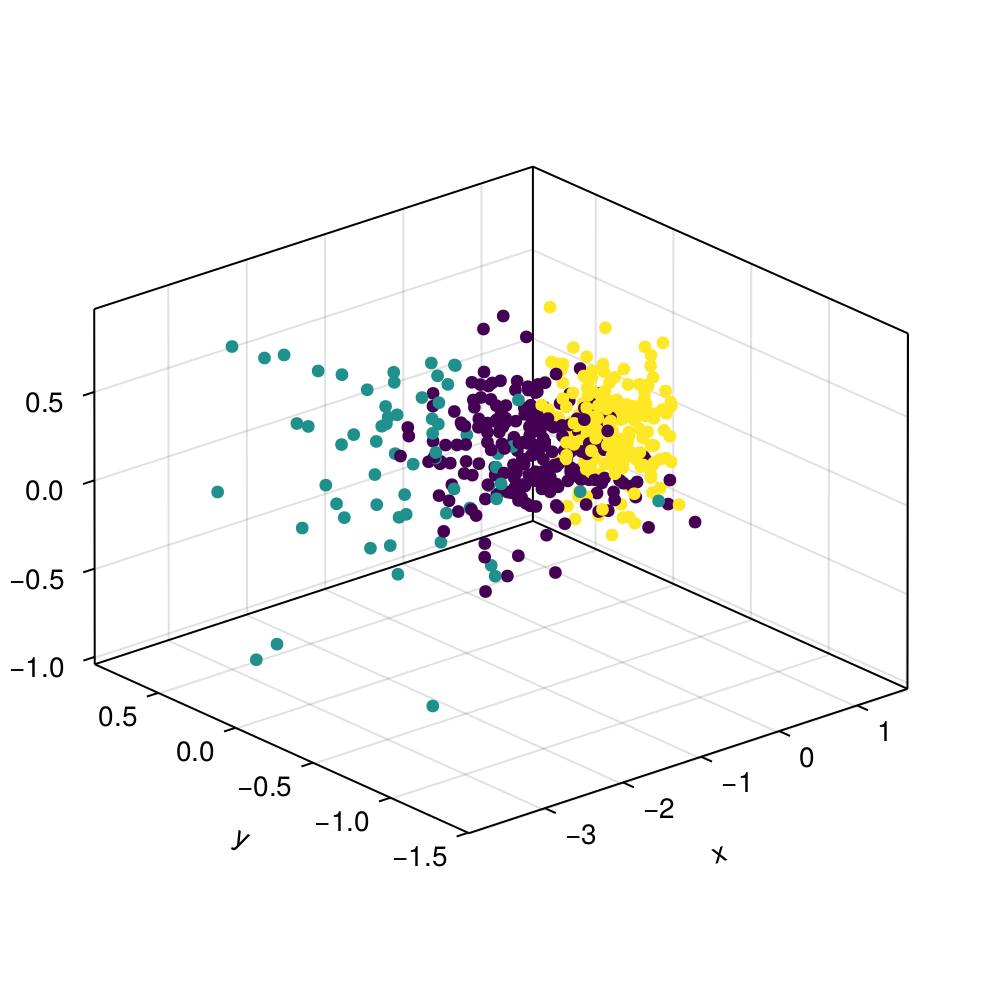

In [15]:
R = kmeans(Yte, 3)

@assert nclusters(R) == 3 # verify the number of clusters

a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers

fig = Figure(size=(500, 500))
ax = Axis3(fig[1, 1])
scatter!(ax, Yte, color=a, legend=false)
fig

In [16]:
for (x, y) in zip(gc, a)
    println(x, y)
end

("Glucose", 1)1
("Glucose", 2)1
("Ampicillin", 1)1
("H2O2 (0.1mM, 30min)", 1)1
("LB", 1)1
("LB", 2)3
("Xylose", 1)3
("Xylose", 2)1
("Arabinose", 1)1
("Arabinose", 2)1
("Sodium Salicytate", 1)1
("Ethanol", 1)1
("Stationary Phase (1d)", 1)3
("Nirtogen starvation", 1)1
("Magnesium starvation", 1)1
("Sulphur starvation", 1)3
("Sodium Salicytate (induction)", 1)1
("Ampicillin (induction)", 1)3
("Ethanol (induction)", 1)1
("Ethanol (induction)", 2)2
("Glutamic acid (pH 2.5)", 1)3
("2pH (HCl)", 1)2
("Medium Cold shock 19C ", 1)3
("2,2-Dipyridyl ", 1)1
("Phenazine Methosulfate ", 1)1
("Pyruvate", 1)1
("H2O2 (2.5mM, 10min)", 1)3
("Gentamycin", 1)3
("Copper Sulfate", 1)1
("Spermidine", 1)1
("Serine Hydroxamate", 1)1
("Low Osmolarity", 1)1
("LB + higher salt concentration - high osmolarity", 1)1
("Low Phosphate", 1)1
("Galactose", 1)3
("Cold Shock (1h at 10C)", 1)1


## Phylogenetic Tree